In [ ]:
#23.07.27
# SMP 데이터(2022.1~2023.6)
# LNG 데이터(2022.1~2023.6) 모으기
# 온도 데이터(2022.1~2023.6) - 모으기 쉬운 거

# Step1을 SMP와 LNG 데이터에 맞춰서 코드 변환
# Gas 데이터만 우리나라 데이터로 바꿔서 시뮬레이션

# SMP 가격 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import Cleaning, Graphs

pd.options.display.max_rows = 999

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

Data Import

Data gathered from Nordpool Day Ahead historical data

In [18]:
#df1 = pd.read_html('data/n2ex-day-ahead-auction-prices_2013_hourly_gbp.xls')
#df2 = pd.read_html('data/n2ex-day-ahead-auction-prices_2014_hourly_gbp.xls')
#df3 = pd.read_html('data/n2ex-day-ahead-auction-prices_2015_hourly_gbp.xls')
#df4 = pd.read_html('data/n2ex-day-ahead-auction-prices_2016_hourly_gbp.xls')
#df5 = pd.read_html('data/n2ex-day-ahead-auction-prices_2017_hourly_gbp.xls')
#df6 = pd.read_html('data/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls')
#df7 = pd.read_html('data/n2ex-day-ahead-auction-prices_2019_hourly_gbp.xls')
new_df1=pd.read_excel('data/n2ex-day-ahead-auction-prices_2019_hourly_gbp1.xls')
new_df2=pd.read_excel('data/n2ex-day-ahead-auction-prices_2013_hourly_gbp1.xls')
new_df3=pd.read_excel('data/n2ex-day-ahead-auction-prices_2014_hourly_gbp1.xls')
new_df4=pd.read_excel('data/n2ex-day-ahead-auction-prices_2015_hourly_gbp1.xls')
new_df5=pd.read_excel('data/n2ex-day-ahead-auction-prices_2016_hourly_gbp1.xls')
new_df6=pd.read_excel('data/n2ex-day-ahead-auction-prices_2017_hourly_gbp1.xls')
new_df7=pd.read_excel('data/n2ex-day-ahead-auction-prices_2018_hourly_gbp1.xls')


# Data Cleaning

In [19]:
cleaner = Cleaning()

#new_df1 = cleaner.clean_df(df1)
#new_df2 = cleaner.clean_df(df2)
#new_df3 = cleaner.clean_df(df3)
#new_df4 = cleaner.clean_df(df4)
#new_df5 = cleaner.clean_df(df5)
#new_df6 = cleaner.clean_df(df6)
#new_df7 = cleaner.clean_df(df7)

elec_price = pd.concat([new_df1,new_df2,new_df3,new_df4,new_df5,new_df6,new_df7])

In [20]:
elec_price_total = cleaner.datetime_fixer(elec_price)

# Exploratory Data Analysis

### Visualising all prices over time

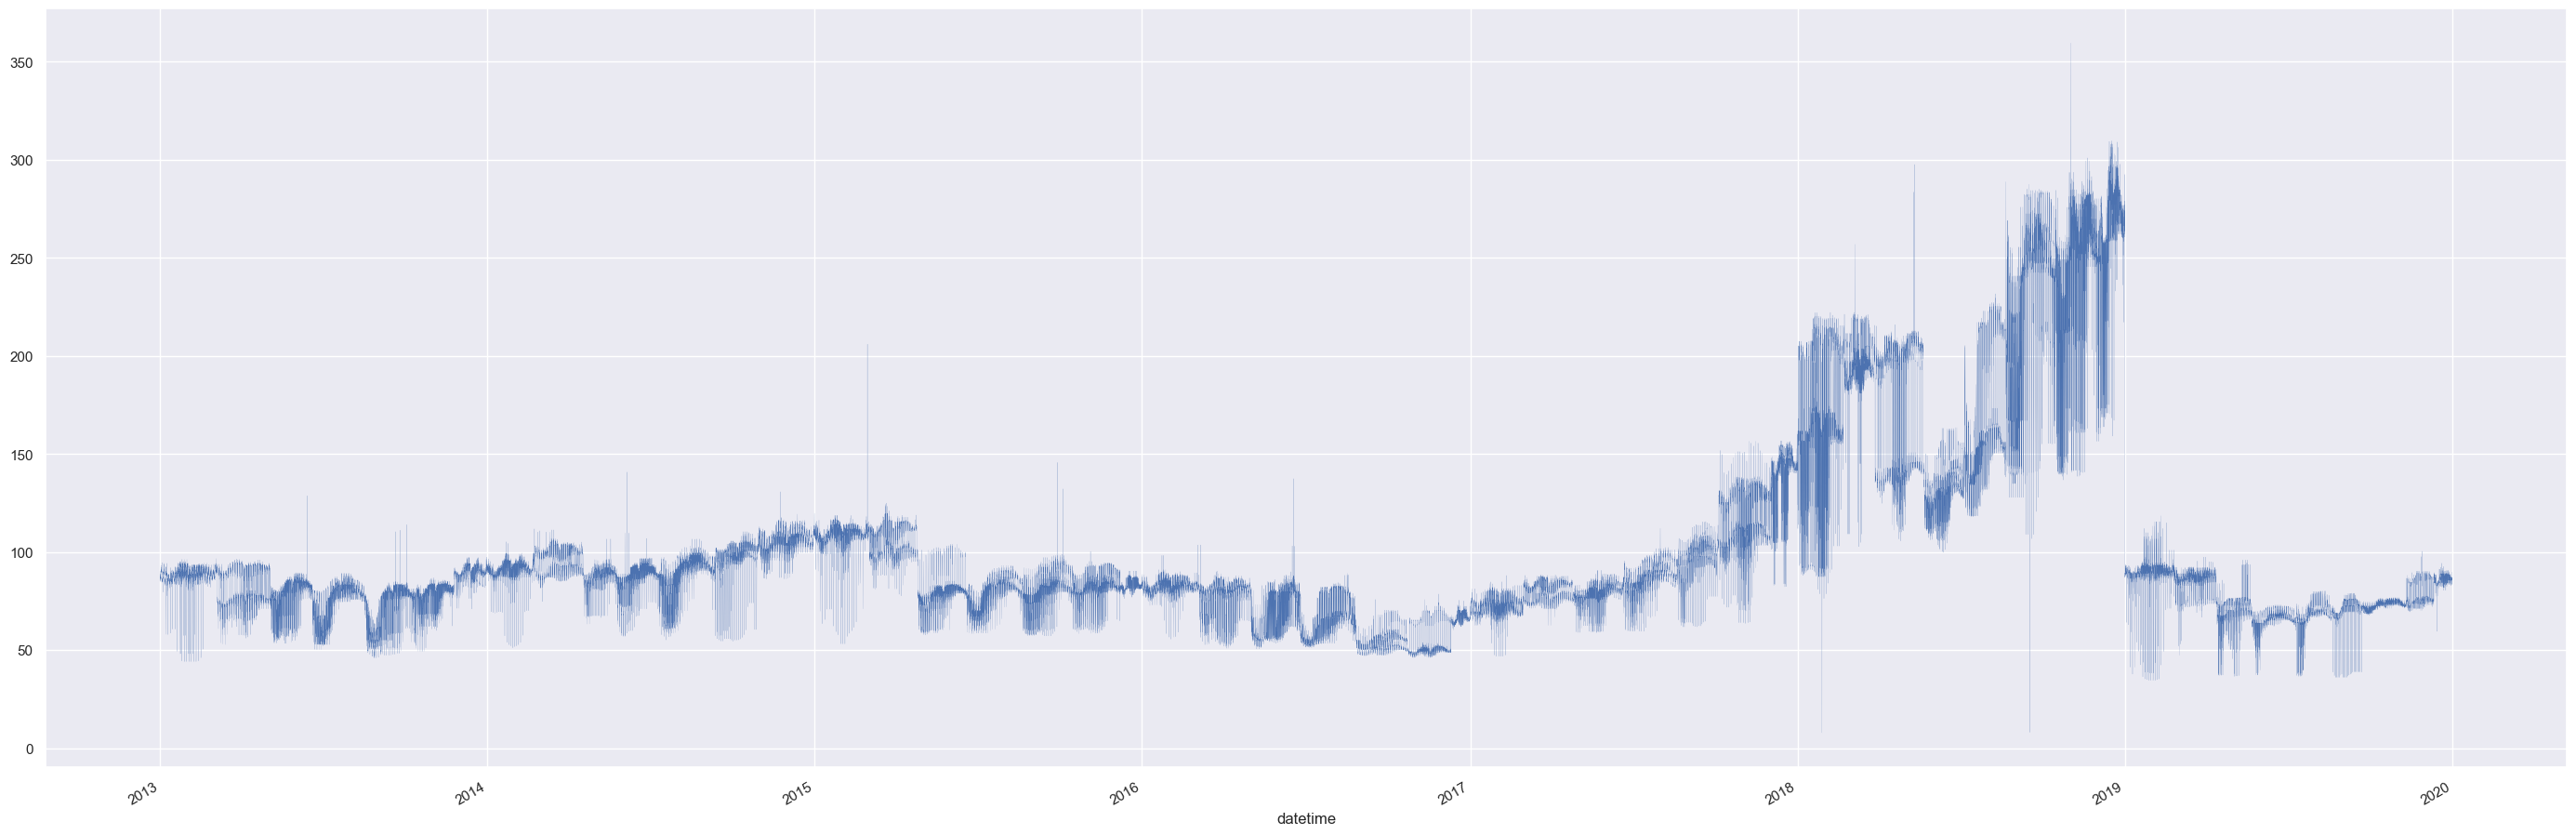

In [21]:
sns.set(rc={'figure.figsize':(35, 12)})
elec_price_total['GBP/mWh'].plot(linewidth=0.1);


In [22]:
# Calculating rolling mean and standard deviation for stationarity checks

roll_mean = elec_price_total['GBP/mWh'].rolling(window=4, center=False).mean()
roll_std = elec_price_total['GBP/mWh'].rolling(window=4, center=False).std()

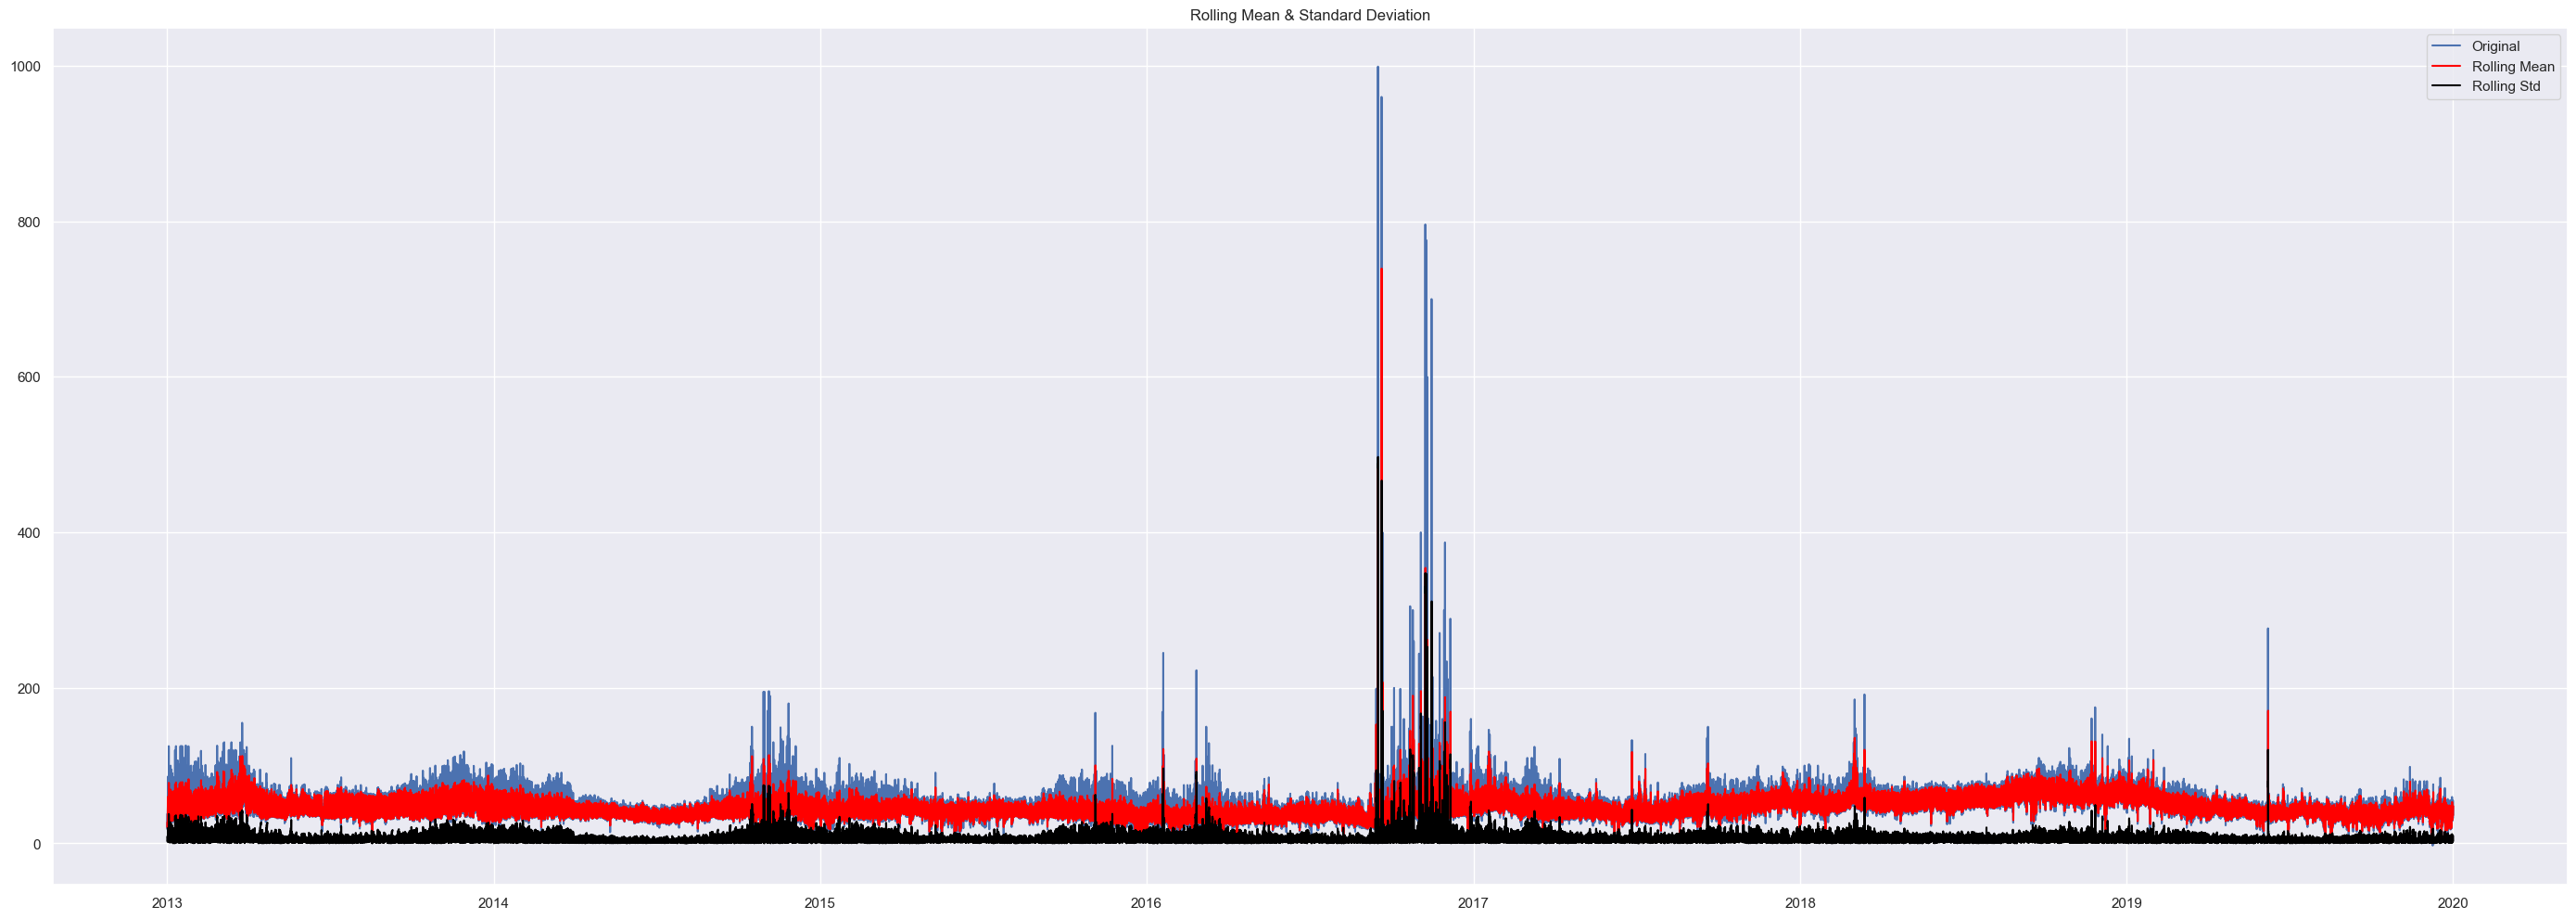

In [8]:
fig = plt.figure(figsize=(35,12))
plt.plot(elec_price_total['GBP/mWh'], label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## The graph above is difficult to read properly. 
## Taking Averages helps to vizualise the trends over time.

<Axes: title={'center': 'Average Weekly Price over time'}, xlabel='datetime'>

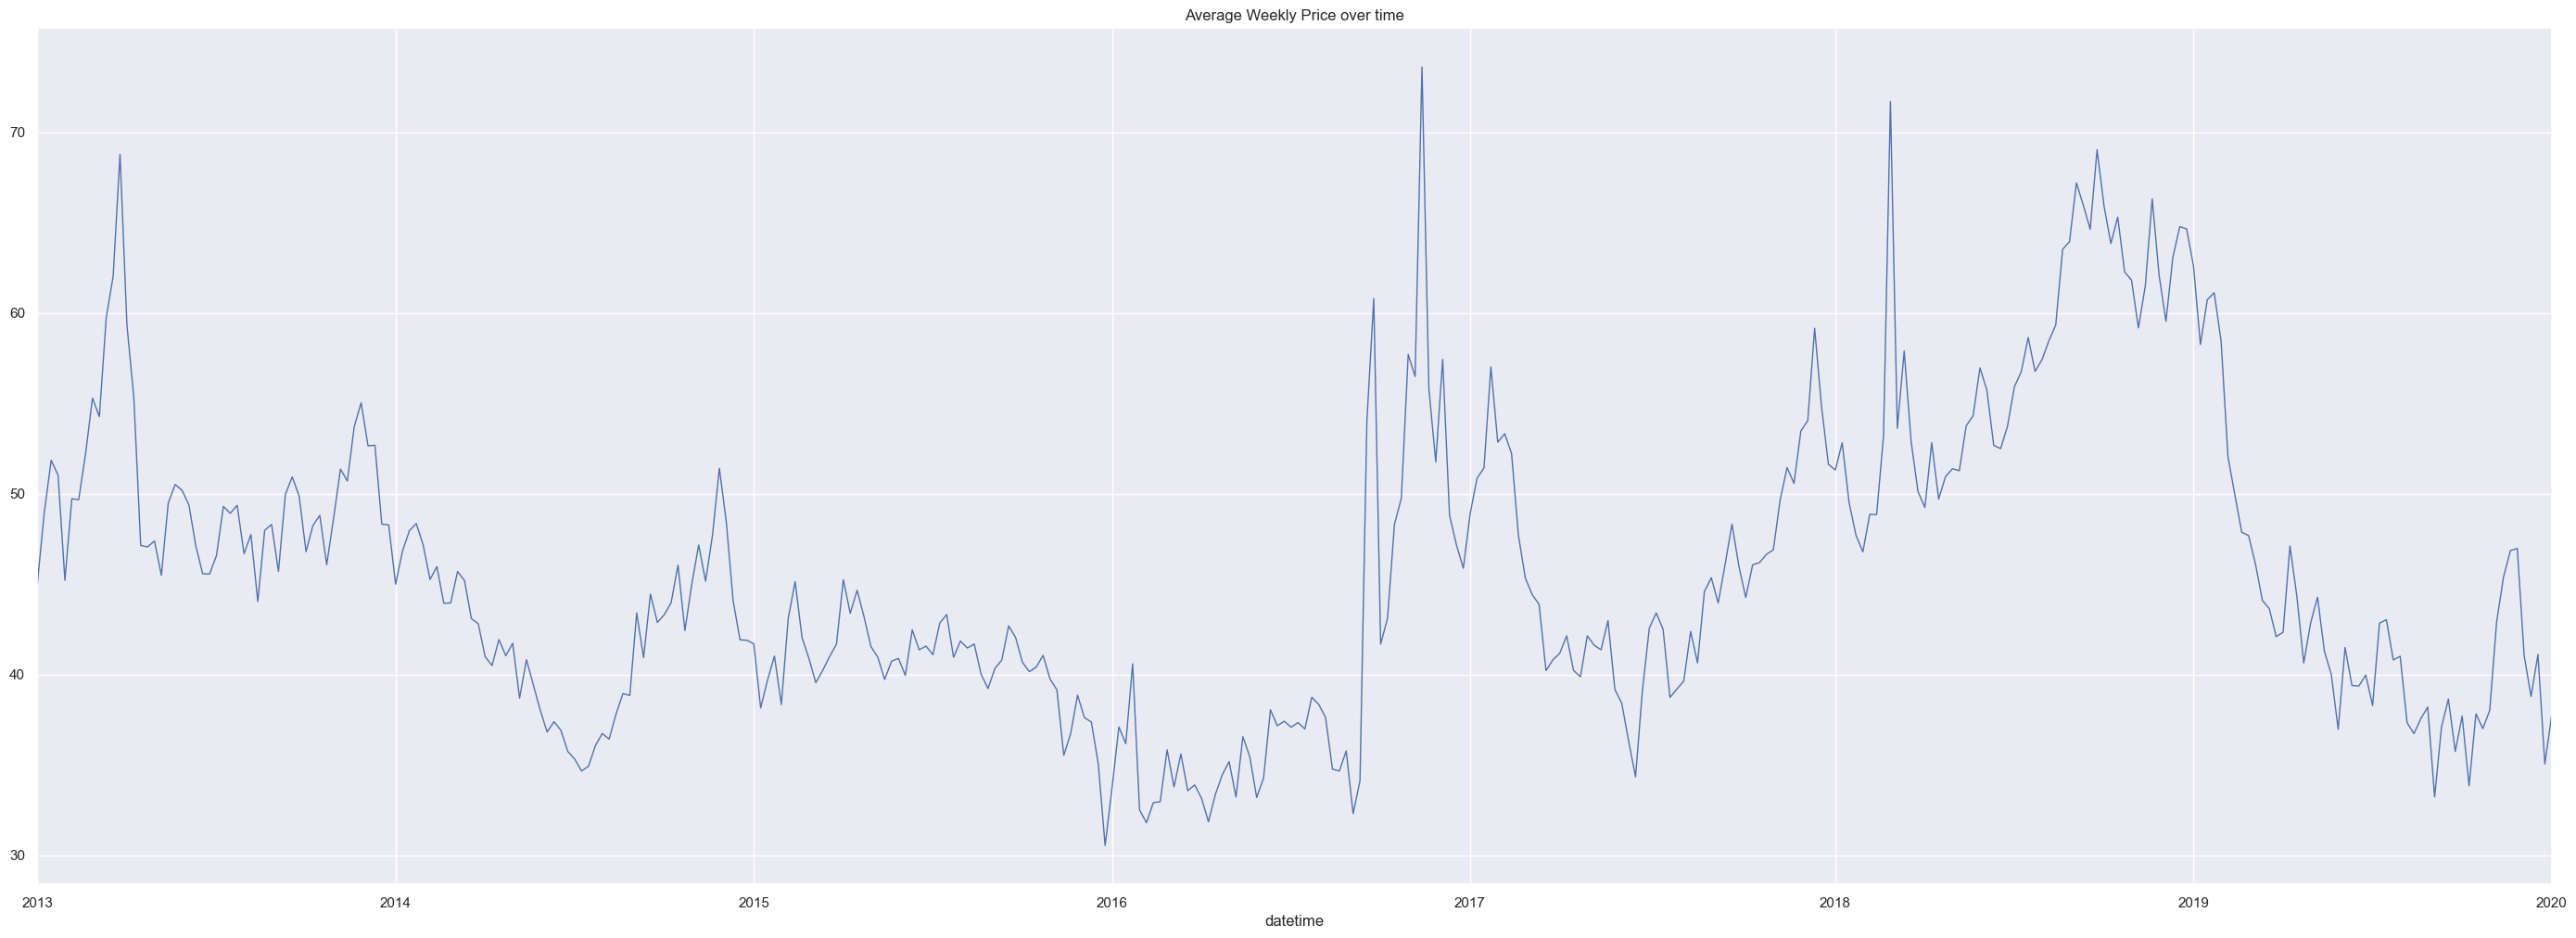

In [9]:
price_weekly = elec_price_total.resample('W') # 주 단위로 시간 간격을 재조정하여 데이터를 가공
weekly_mean = price_weekly.mean()
sns.set(rc={'figure.figsize':(35, 12)})
weekly_mean['GBP/mWh'].plot(linewidth=1, title = 'Average Weekly Price over time')

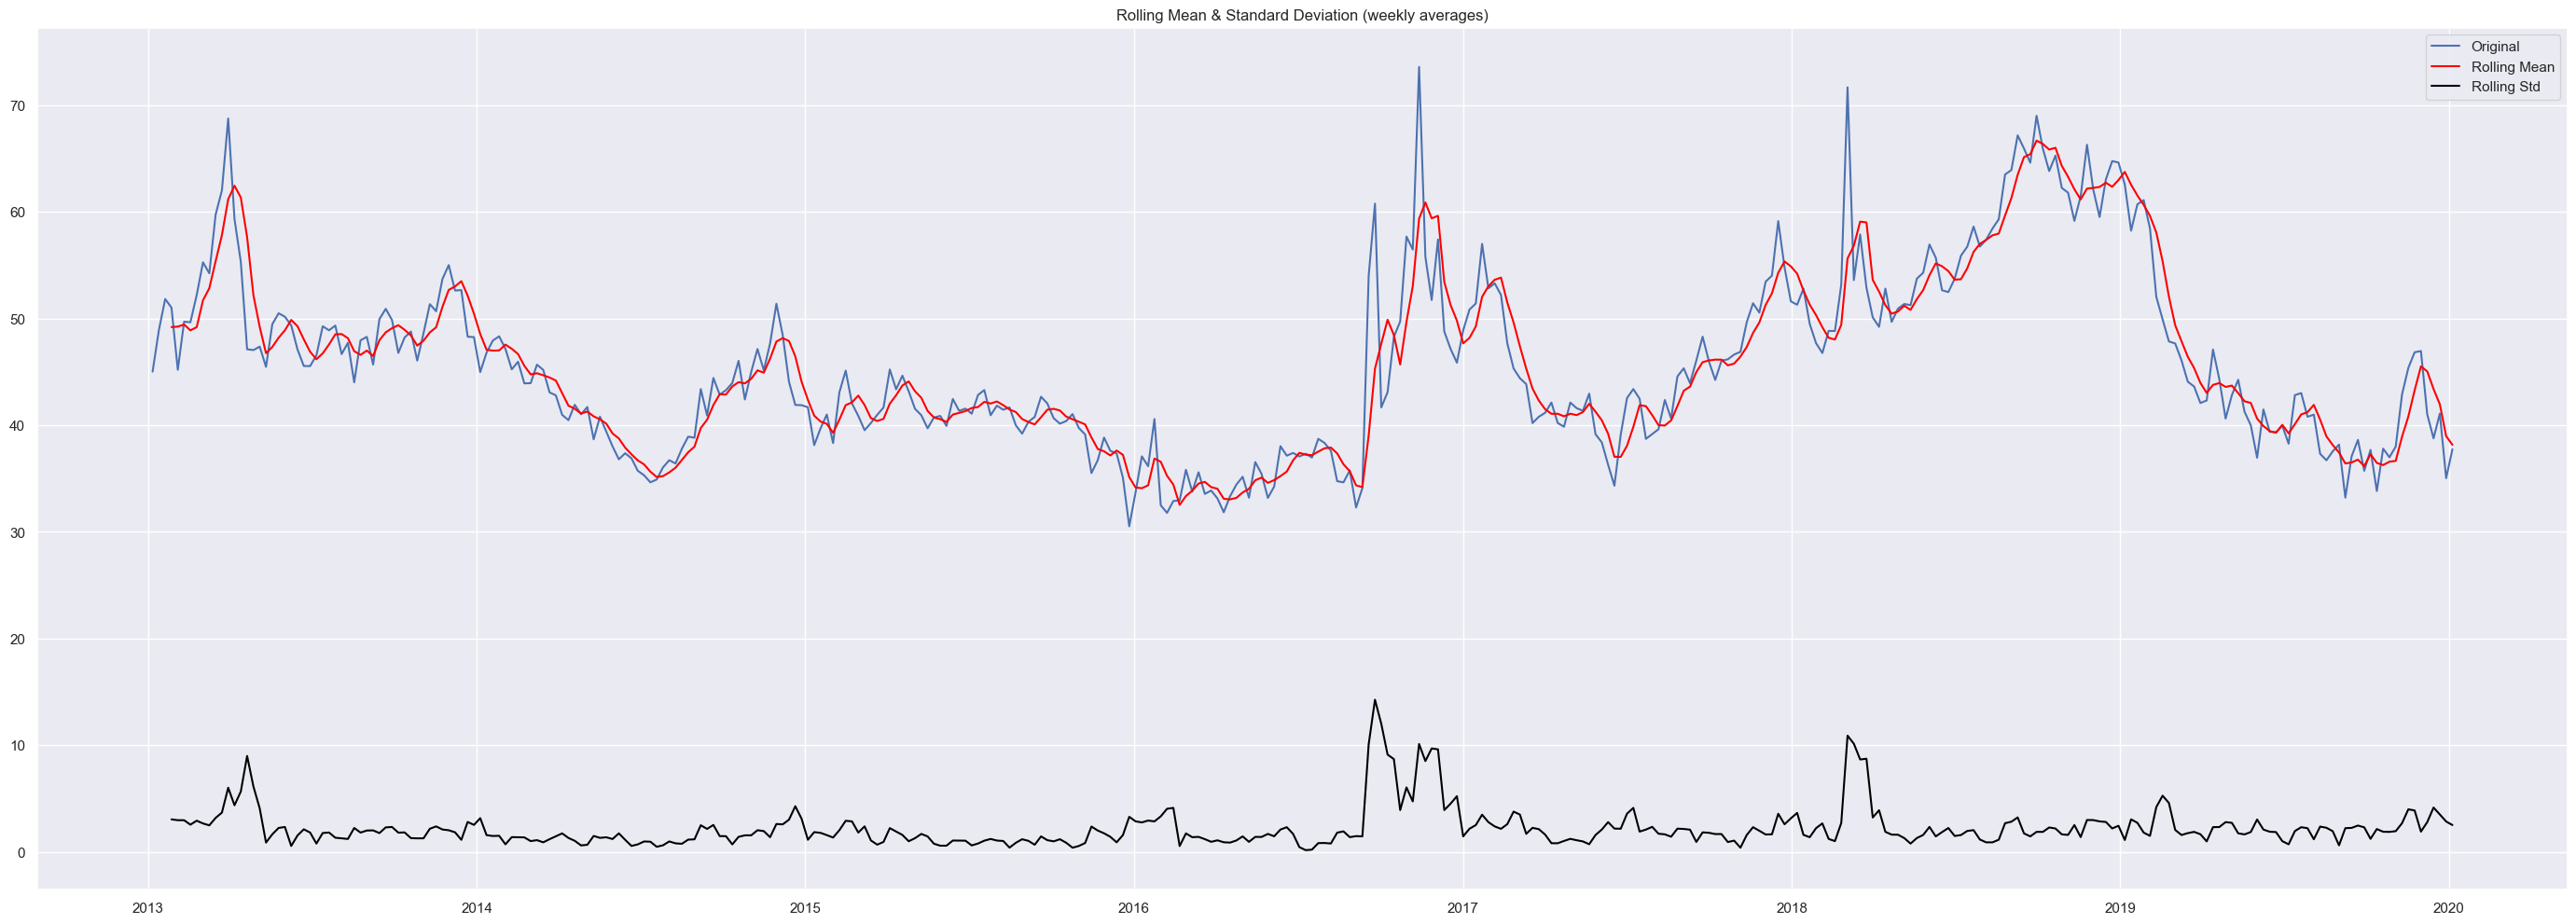

In [10]:
weekly_roll_mean = weekly_mean['GBP/mWh'].rolling(window=4, center=False).mean()
weekly_roll_std = weekly_mean['GBP/mWh'].rolling(window=4, center=False).std()


fig = plt.figure(figsize=(35, 12))
plt.plot(weekly_mean['GBP/mWh'], label='Original')
plt.plot(weekly_roll_mean, color='red', label='Rolling Mean')
plt.plot(weekly_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (weekly averages)')
plt.show(block=False)

<Axes: title={'center': 'Daily average price over time'}, xlabel='datetime'>

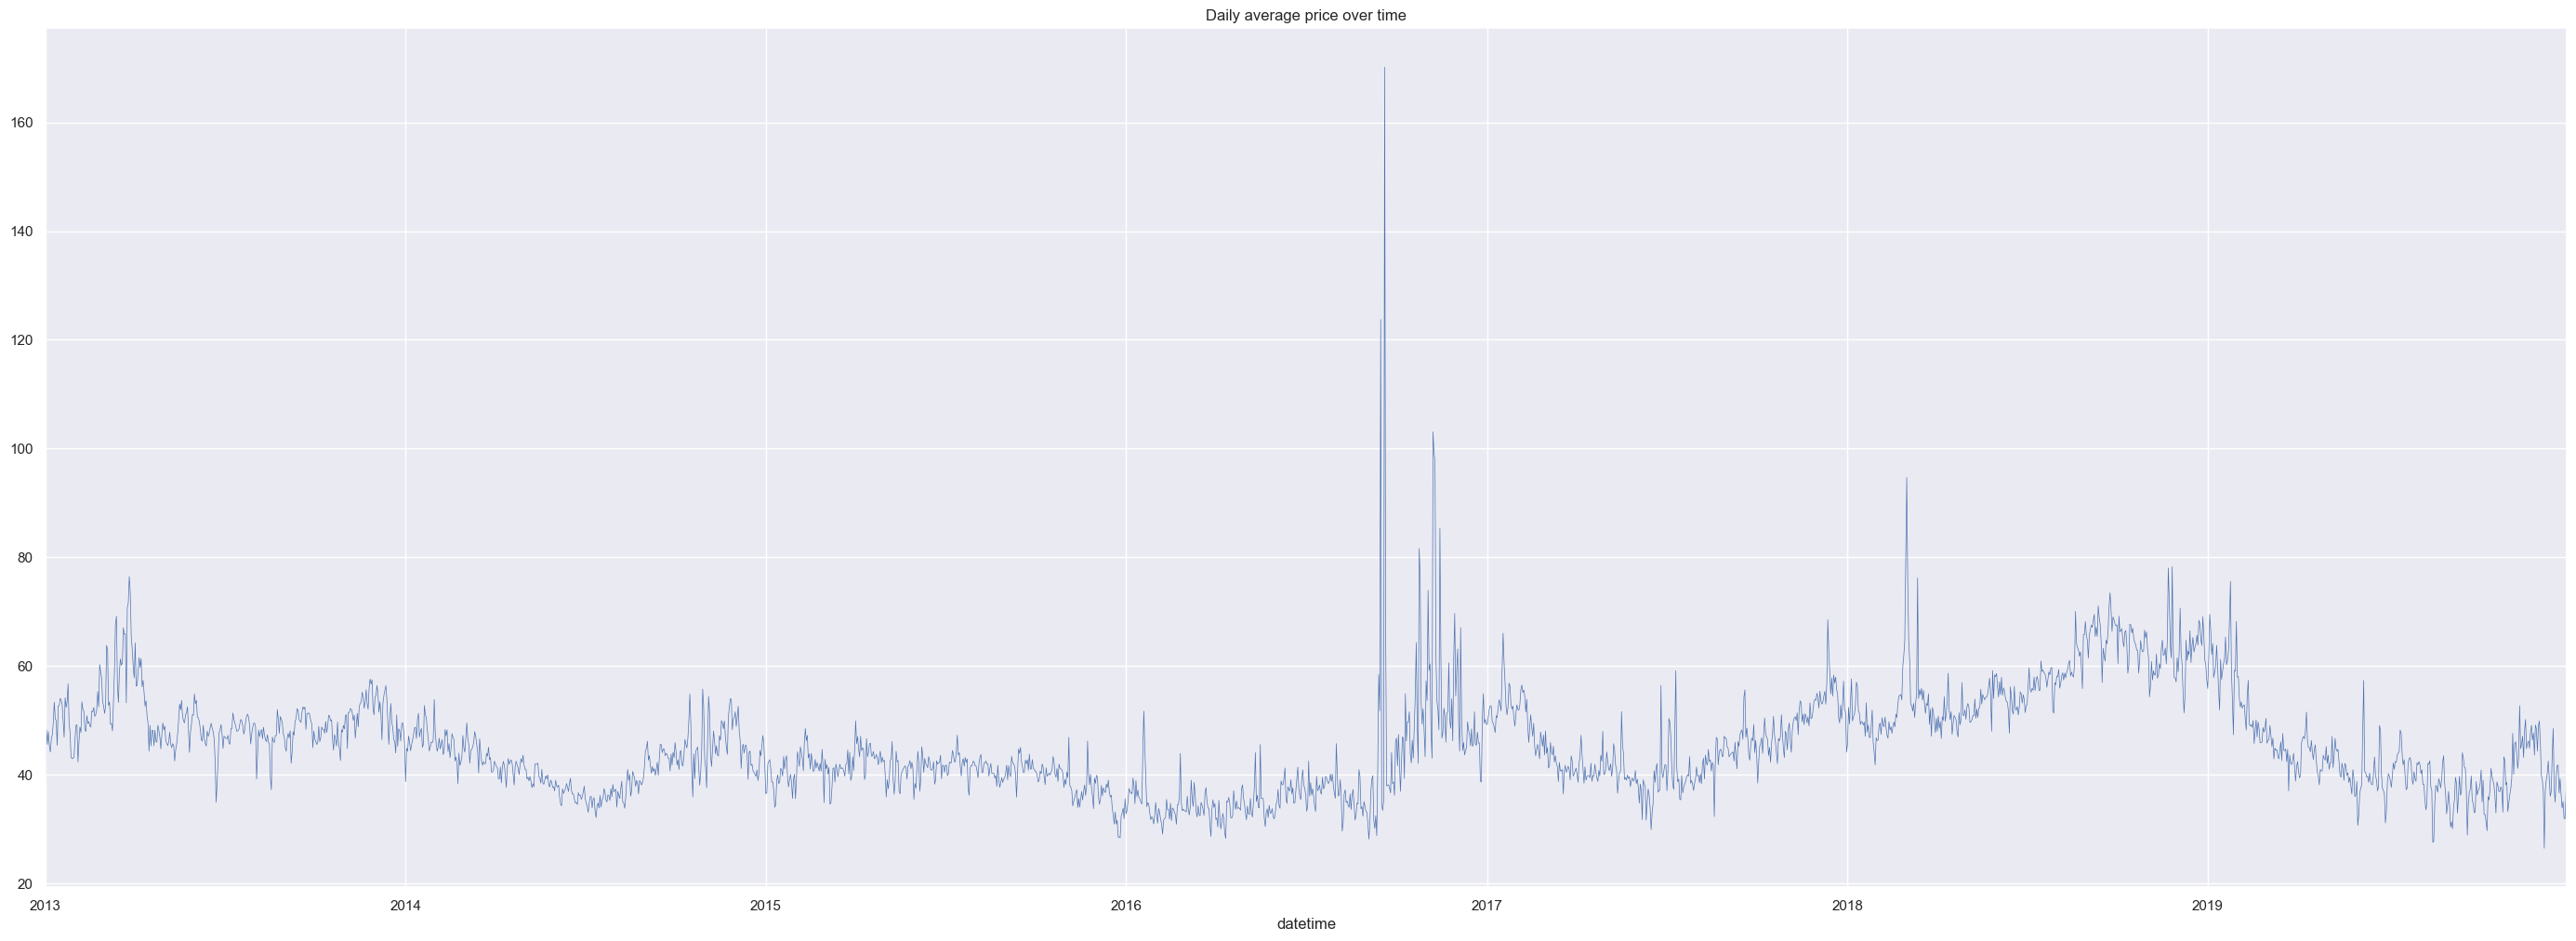

In [11]:
price_daily = elec_price_total.resample('D') # 일 단위로 시간간격을 재조정
daily_mean = price_daily.mean()
sns.set(rc={'figure.figsize':(35, 12)})
daily_mean['GBP/mWh'].plot(linewidth=0.5, title = 'Daily average price over time')

# One day of Price Change

Text(0, 0.5, 'Daily Price')

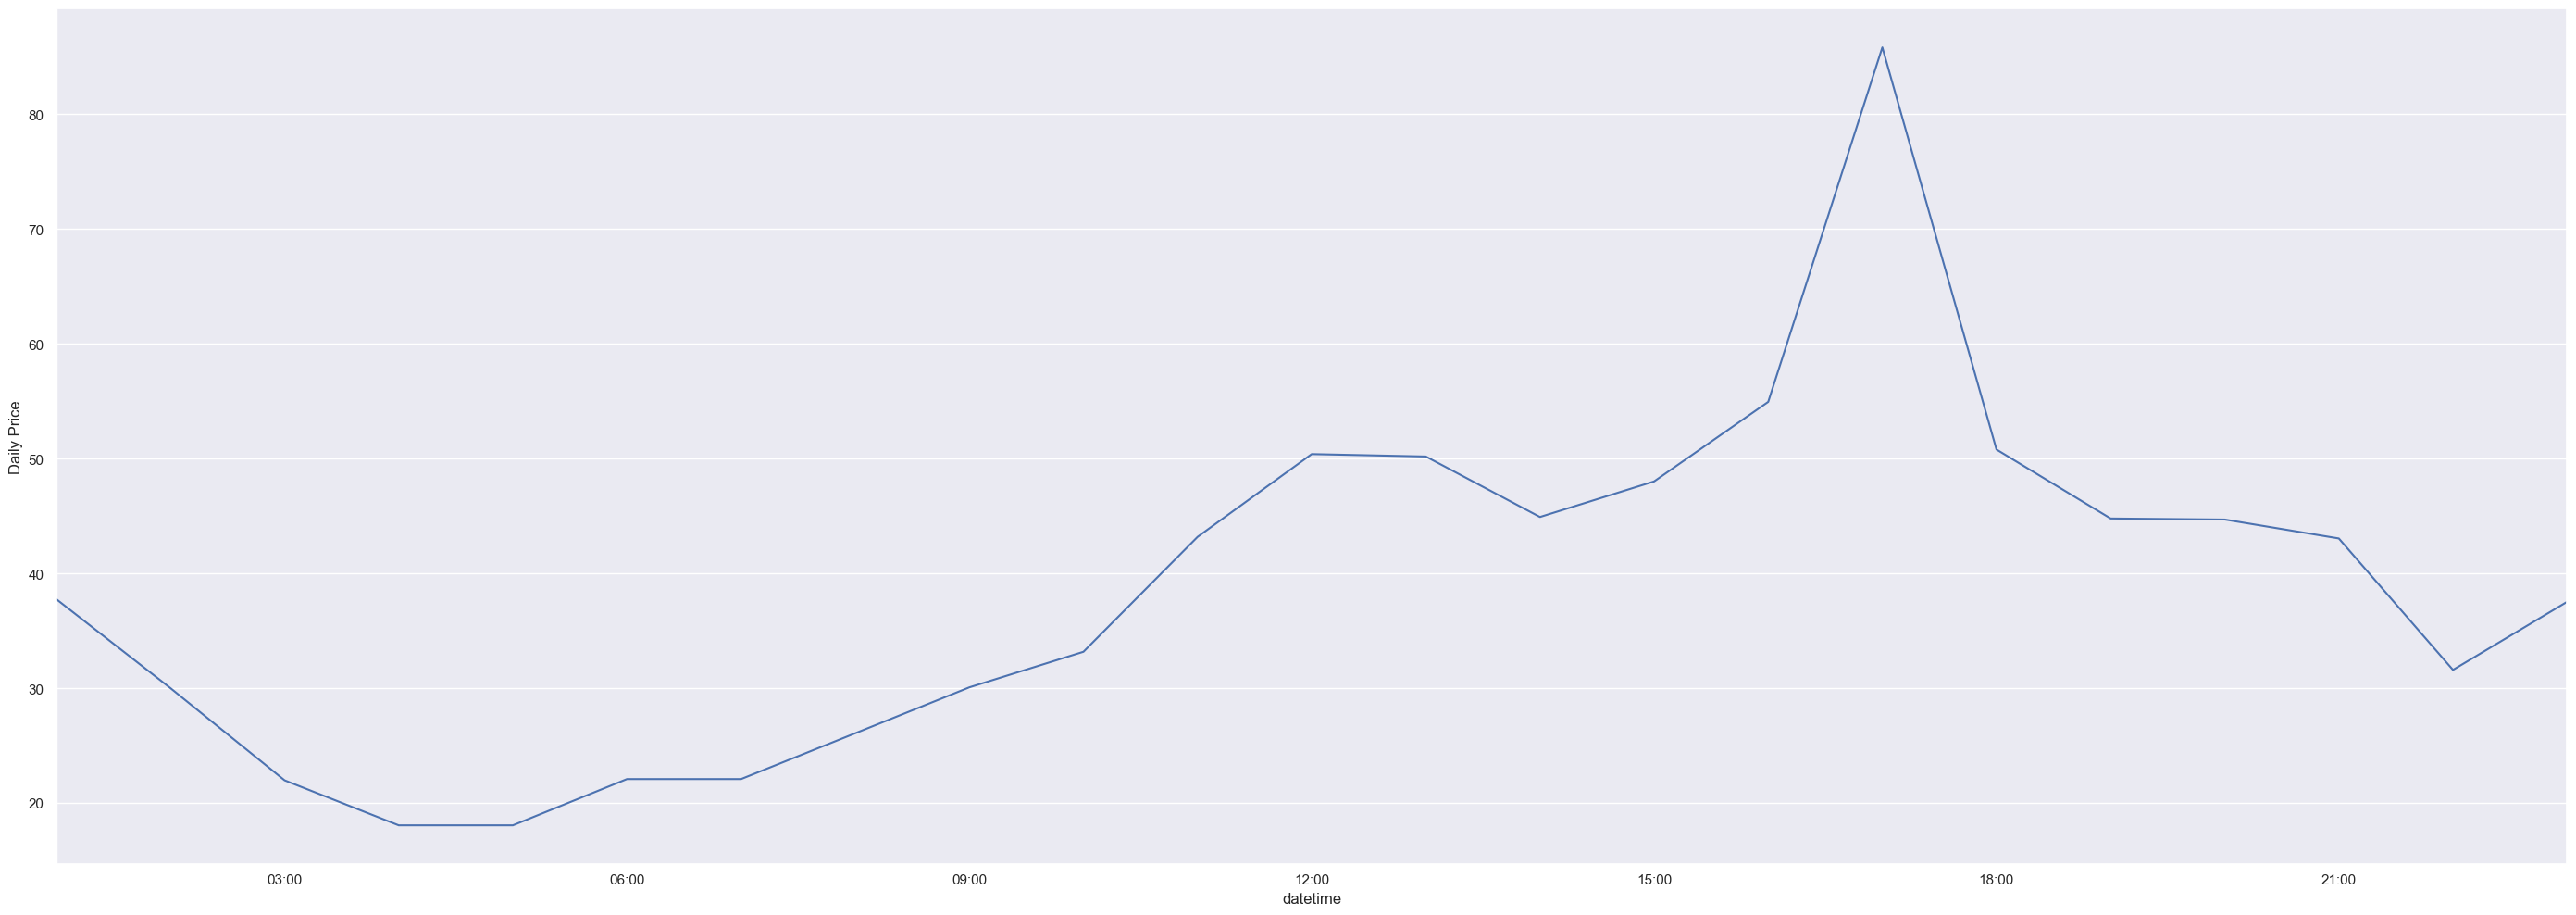

In [12]:
ax = elec_price_total.loc['2013-01-01', 'GBP/mWh'].plot() # 특정 일자의 가격만 보고 싶을 때
ax.set_ylabel('Daily Price')


# Average daily electricity price change by year

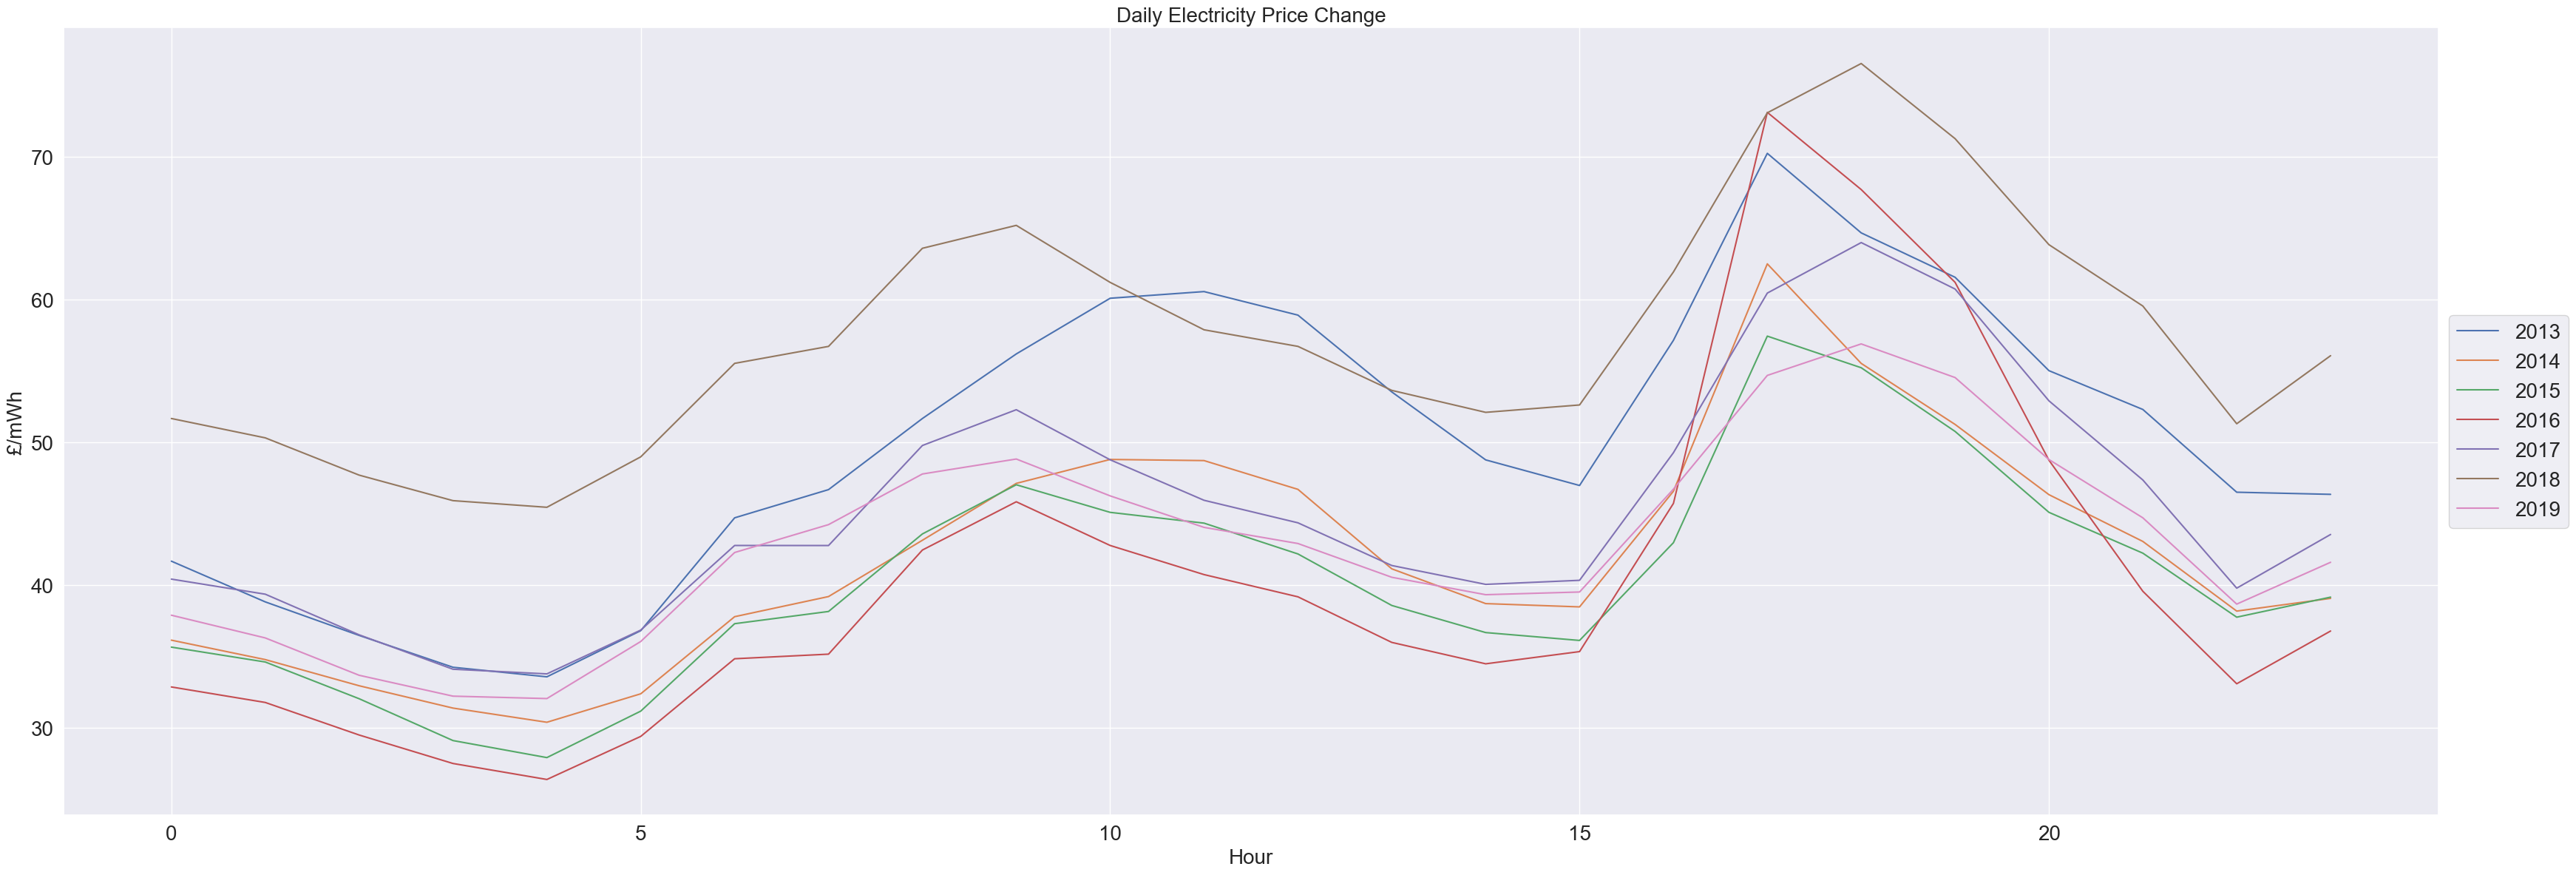

In [13]:

df_pivot = pd.pivot_table(elec_price_total, index=elec_price_total.index.hour, columns=elec_price_total.index.year, values='GBP/mWh')

ax = df_pivot.plot(title='Data by Year', figsize=(35, 12))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5) ,prop={'size': 20})
ax.set_ylabel('£/mWh', fontsize=20)
ax.set_xlabel('Hour', fontsize=20)

ax.set_title('Daily Electricity Price Change', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.figure.tight_layout()
plt.show()

# Electricity Prices monthly averages by year

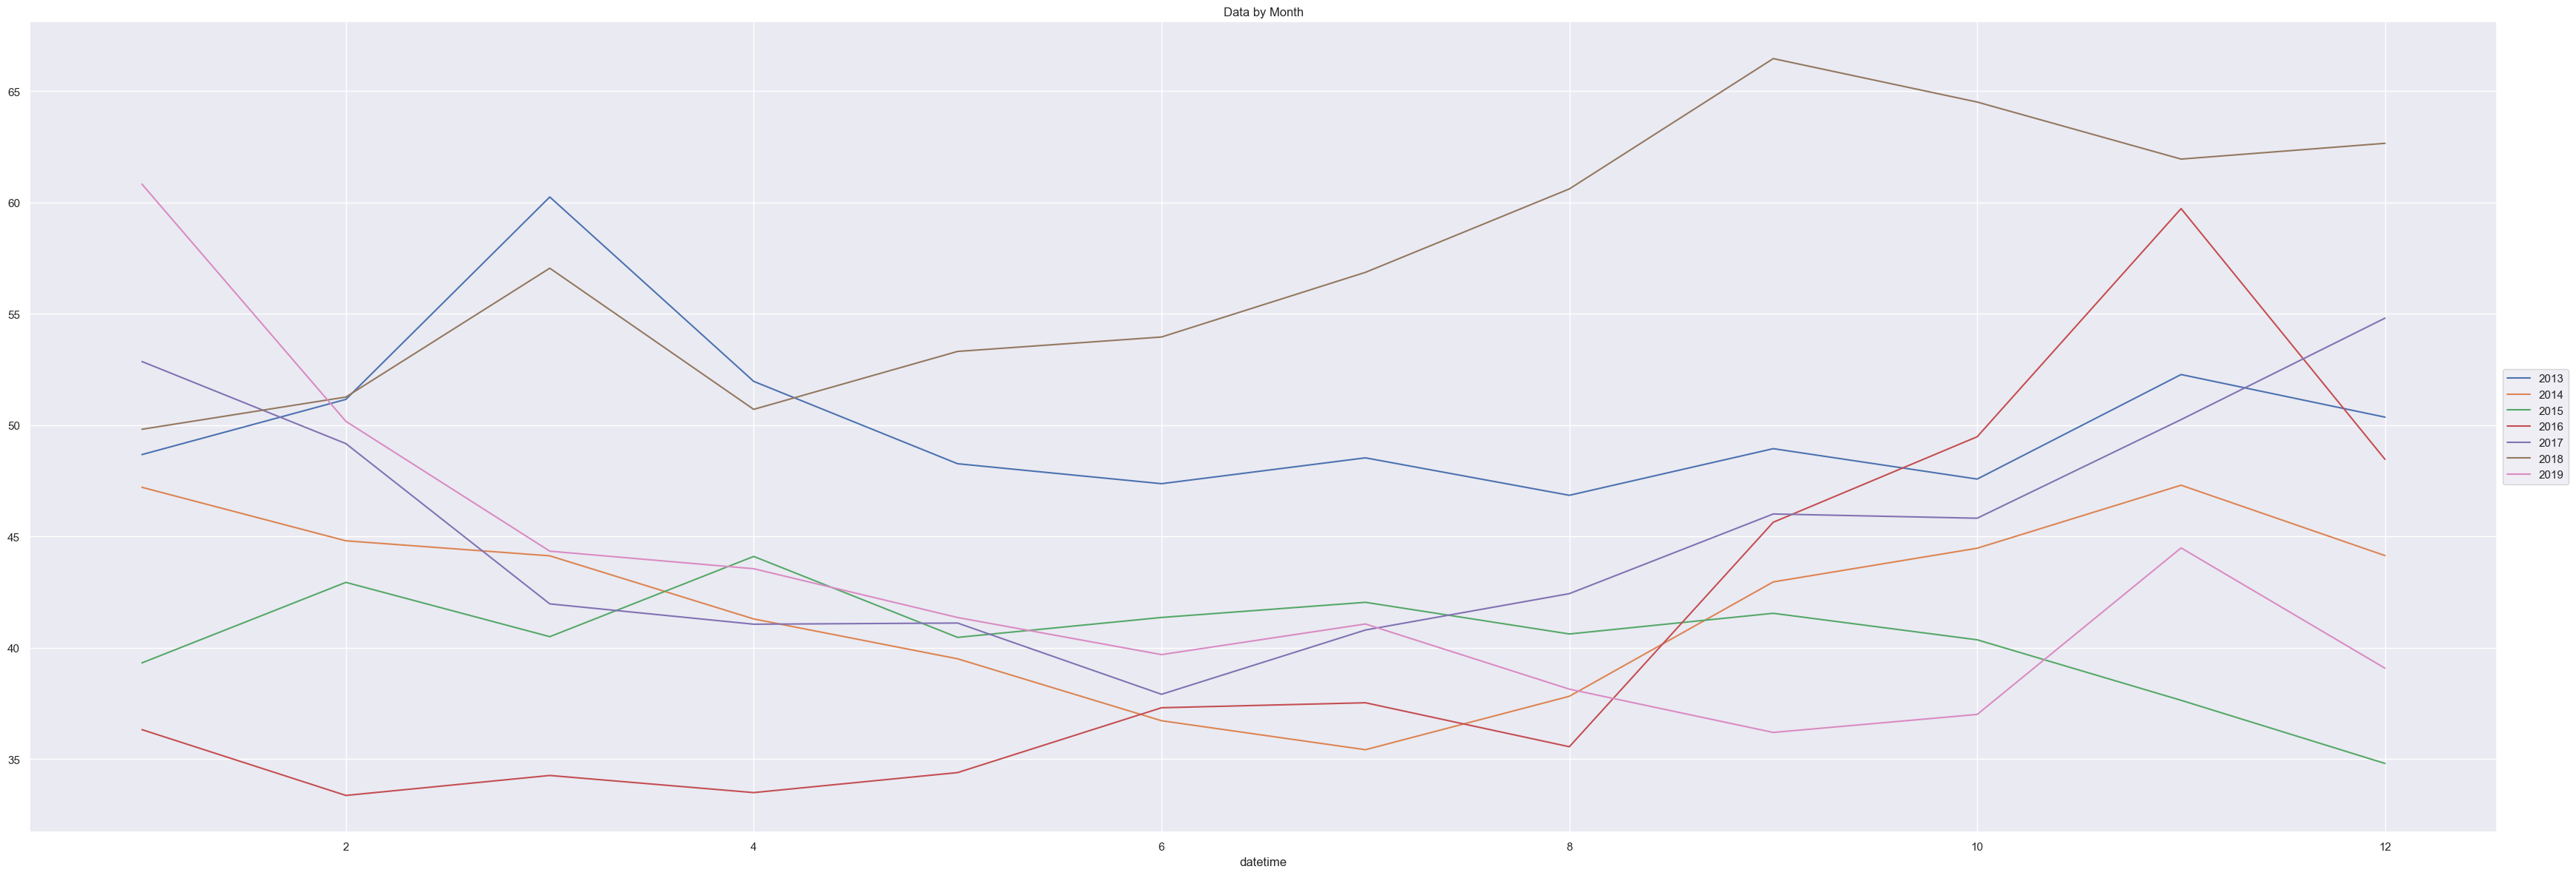

In [14]:
df_pivot = pd.pivot_table(elec_price_total, index=elec_price_total.index.month, columns=elec_price_total.index.year, values='GBP/mWh')
ax = df_pivot.plot(title='Data by Month', figsize=(35, 12))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.tight_layout()
plt.show()

# Natural Gas vs Electricity Prices

In [15]:
price_monthly = elec_price_total.resample('MS')
month_mean = price_monthly.mean()

In [16]:
natgas = pd.read_csv('data/Natural Gas Futures Historical Data.csv')

vizualizer = Graphs()
natgas = vizualizer.clean_for_viz(natgas)

d:\Workfolder\Price_forecasting\Modified_ElePrice_Forecast\functions.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'])


In [17]:
nat_gas_price_monthly = natgas.resample('MS')
nat_gas_month_mean = nat_gas_price_monthly.mean()

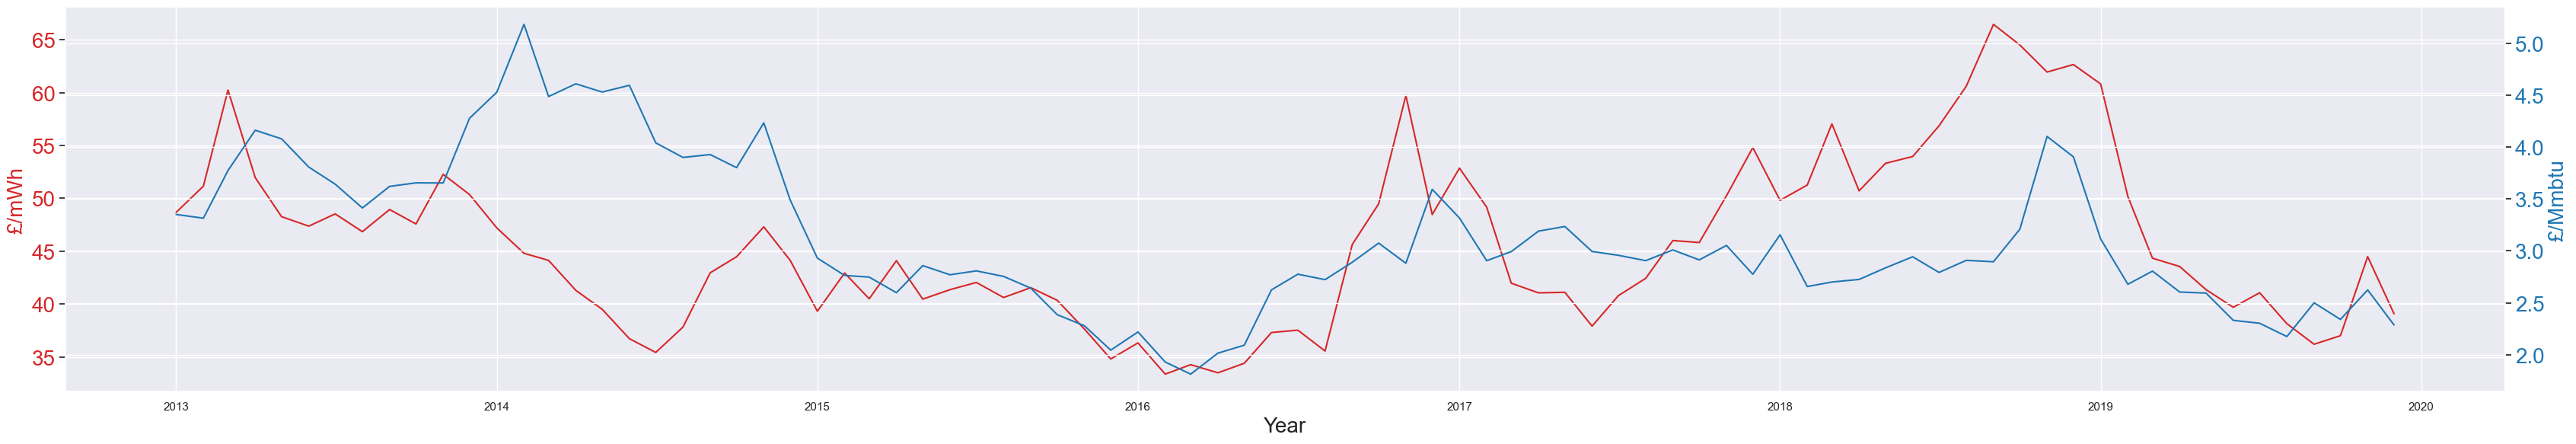

In [18]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = nat_gas_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('£/mWh', color=color, fontsize=20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('£/Mmbtu', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Oil vs Electricity Prices

In [19]:
oil_gbp = pd.read_csv('data/Brent Oil Futures Historical Data.csv')

oil_gbp = vizualizer.clean_for_viz(oil_gbp)

oil_gbp_monthly = oil_gbp.resample('MS')
oil_gbp_month_mean = oil_gbp_monthly.mean()

d:\Workfolder\Price_forecasting\Modified_ElePrice_Forecast\functions.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'])


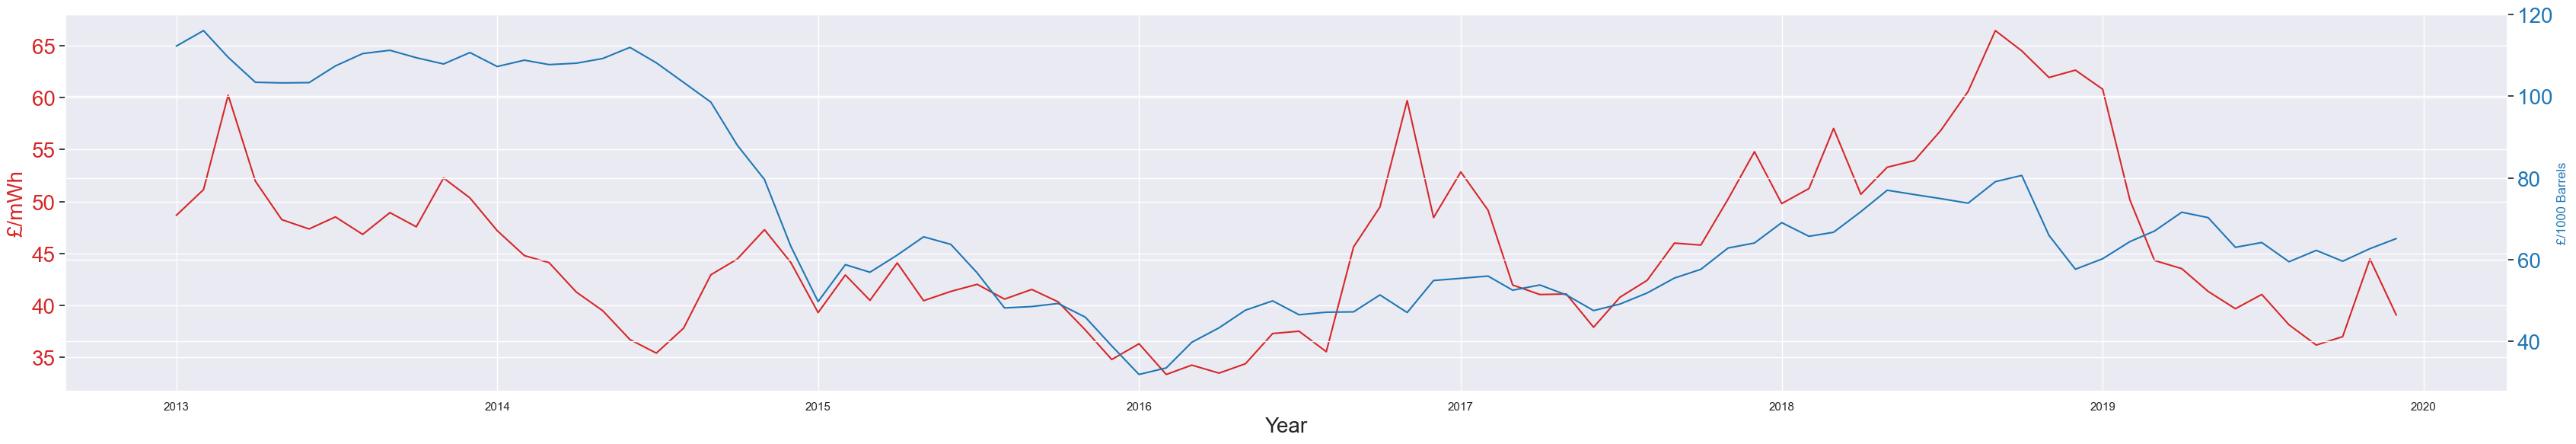

In [20]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = oil_gbp_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('£/mWh', color=color, fontsize=20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('£/1000 Barrels', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Uranium vs Electricity Prices

In [21]:
uranium = pd.read_csv('data/Uranium Futures Historical Data.csv')

uranium = vizualizer.clean_for_viz(uranium)


uranium_monthly = uranium.resample('MS')
uranium_month_mean = uranium_monthly.mean()


d:\Workfolder\Price_forecasting\Modified_ElePrice_Forecast\functions.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'])


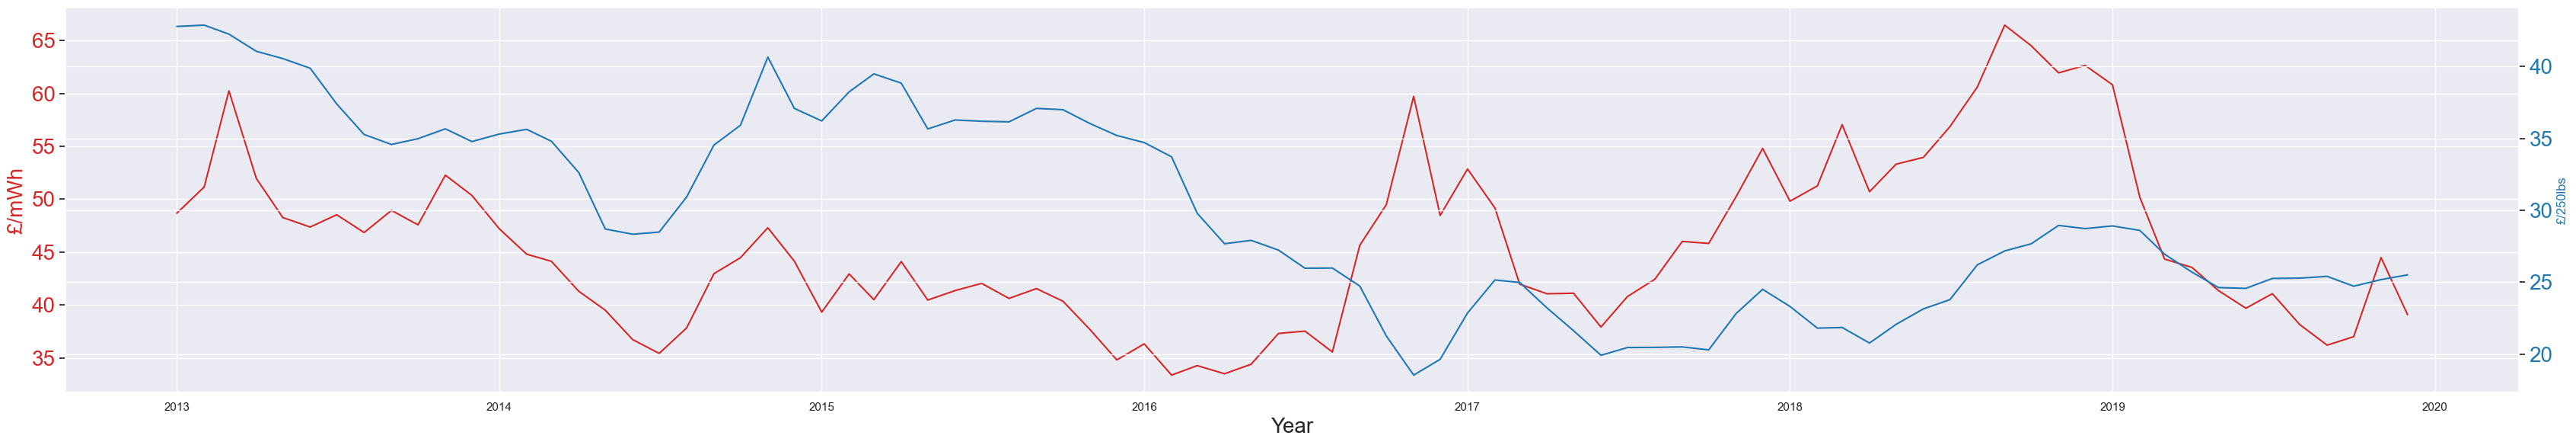

In [22]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = uranium_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34, 6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize = 20)
ax1.set_ylabel('£/mWh', color=color,fontsize = 20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('£/250lbs', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Coal Prices Vs Electiricity Prices

In [23]:
coal = pd.read_csv('data/Newcastle Coal Futures Historical Data.csv')

coal = vizualizer.clean_for_viz(coal)


coal_monthly = coal.resample('MS')
coal_month_mean = coal_monthly.mean()

d:\Workfolder\Price_forecasting\Modified_ElePrice_Forecast\functions.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'])


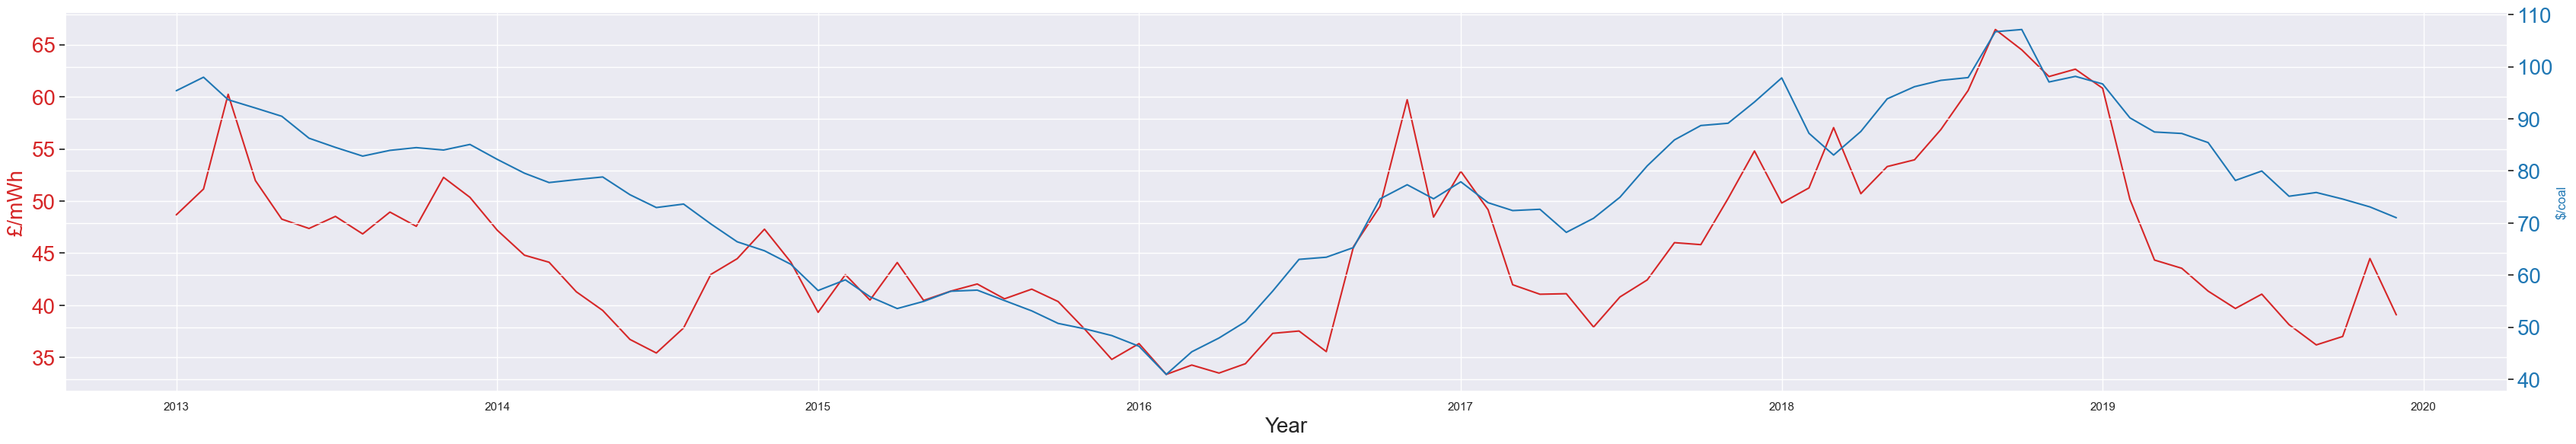

In [24]:
t = month_mean.index
data1 = month_mean['GBP/mWh']
data2 = coal_month_mean['Price']

fig, ax1 = plt.subplots(figsize = (34,6))

color = 'tab:red'
ax1.set_xlabel('Year', fontsize = 20)
ax1.set_ylabel('£/mWh', color=color, fontsize = 20)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$/coal', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize = 20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Data Wrangling

#### The following section involves obtaining hourly weather data via an API, and subsequently adds this to the dataframe containing price. Subsequently it maps the daily natural resource data into hourly, to generate a full dataset from which we can begin modelling

In [25]:
list_of_hours = elec_price_total.index
list_of_hours = list(list_of_hours)

api_formatted_datetimes = []

for key, hour in enumerate(list_of_hours):
    api_formatted_datetimes.append(str(list_of_hours[key])[:10] + 'T' + str(list_of_hours[key])[11:])

In [26]:
DF_Combine = elec_price_total[:]

In [27]:
# Read in weather CSV (from previous API call) and convert back to dictionary

weather = pd.read_csv('data/weather_file.csv', header = None)

weather[0] = weather[0].str.replace(r'T', ' ')
weather[0] = pd.to_datetime(weather[0])
weather.set_index(weather[0], inplace = True)
weather.drop(columns = 0, inplace = True)
weather_dict = weather.to_dict()
weather_dict = weather_dict[1]

DF_Combine.reset_index(inplace = True) # Have to reset index for following map function to work properly

DF_Combine['temperature'] = DF_Combine['datetime'].map(weather_dict) # mapping weather onto df
DF_Combine.reset_index(inplace = True)

C:\Users\kow60\AppData\Local\Temp\ipykernel_10184\64266418.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Combine['temperature'] = DF_Combine['datetime'].map(weather_dict) # mapping weather onto df


### Adding all commodity values, and fixing missing values

In [28]:
list_of_commondities = [coal, oil_gbp, uranium, natgas] 
list_of_commodity_names = ['coal', 'oil', 'uranium', 'natural gas'] 

iteration = 0
for item in list_of_commondities:
    
    item_dict = item.to_dict()
    item_dict = item_dict['Price']
    DF_Combine[str(list_of_commodity_names[iteration] + ' Price')] = DF_Combine['datetime'].map(item_dict) # mapping weather onto df
    DF_Combine[str(list_of_commodity_names[iteration]+ ' Price')].ffill(inplace = True)
    iteration += 1

    

C:\Users\kow60\AppData\Local\Temp\ipykernel_10184\2747209437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Combine[str(list_of_commodity_names[iteration] + ' Price')] = DF_Combine['datetime'].map(item_dict) # mapping weather onto df
C:\Users\kow60\AppData\Local\Temp\ipykernel_10184\2747209437.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Combine[str(list_of_commodity_names[iteration]+ ' Price')].ffill(inplace = True)
C:\Users\kow60\AppData\Local\Temp\ipykernel_10184\2747209437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy

## Exporting a clean dataset to a new CSV

In [29]:
result = DF_Combine[:]
result.set_index('datetime', inplace = True)
result = result.drop(columns = ['index'])
result.to_csv('data_process_result/re_fixed_multivariate_timeseires.csv')